In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
dark_horse = cv2.imread('course material/DATA/horse.jpg') #orig bgr opencv
show_horse = cv2.cvtColor(dark_horse, cv2.COLOR_BGR2RGB) #converted rgb

rainbow = cv2.imread('course material/DATA/rainbow.jpg')
show_rainbow = cv2.cvtColor(rainbow, cv2.COLOR_BGR2RGB)

blue_bricks = cv2.imread('course material/DATA/bricks.jpg')
show_bricks = cv2.cvtColor(blue_bricks, cv2.COLOR_BGR2RGB)

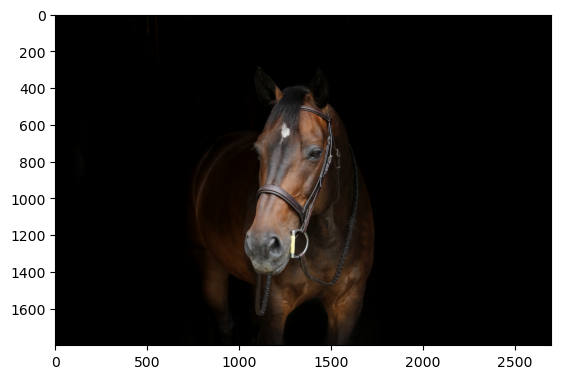

In [4]:
plt.imshow(show_horse)

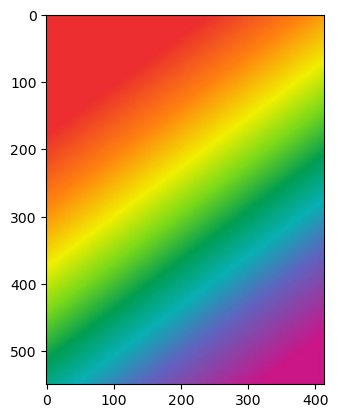

In [5]:
plt.imshow(show_rainbow)

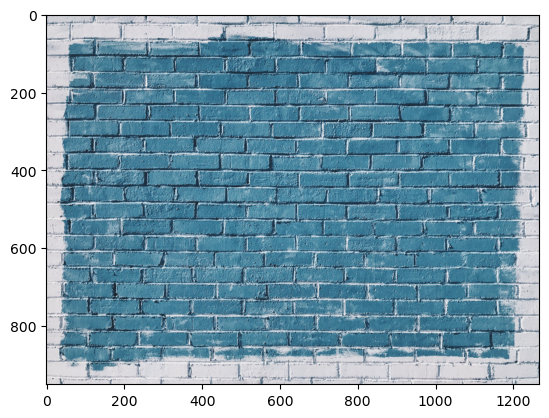

In [6]:
plt.imshow(show_bricks)

In [7]:
#opencv bgr, get blue channel
hist_values = cv2.calcHist([blue_bricks], channels=[0], mask=None, histSize=[256], ranges=[0,256])
hist_values.shape

(256, 1)

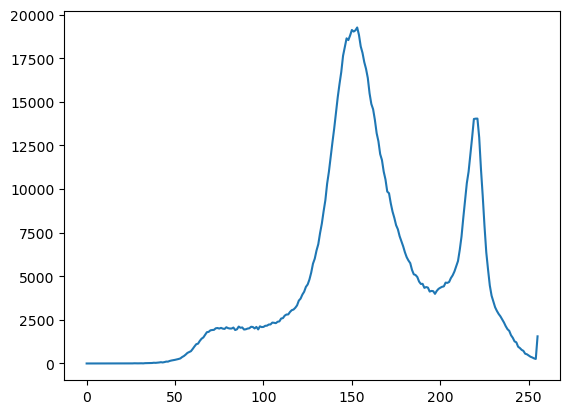

In [8]:
#y = frequency
#x = color (0-255)
#so we can read the frequence of a color in a image, in this case the frequency of blue
plt.plot(hist_values)

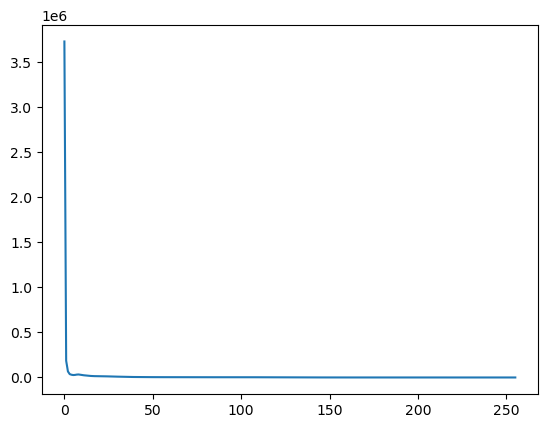

In [9]:
hist_values = cv2.calcHist([dark_horse], channels=[0], mask=None, histSize=[256], ranges=[0,256]) #the horse has no blue at all
plt.plot(hist_values)

Text(0.5, 1.0, 'histogram for blue bricks')

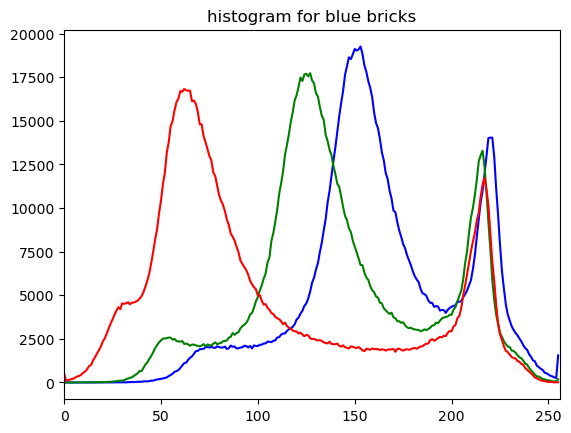

In [10]:
img = blue_bricks #now all color channels
color = ('b','g','r')
for i, col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr, color=col)
    plt.xlim([0,256])
plt.title('histogram for blue bricks')

Text(0.5, 1.0, 'histogram for horse')

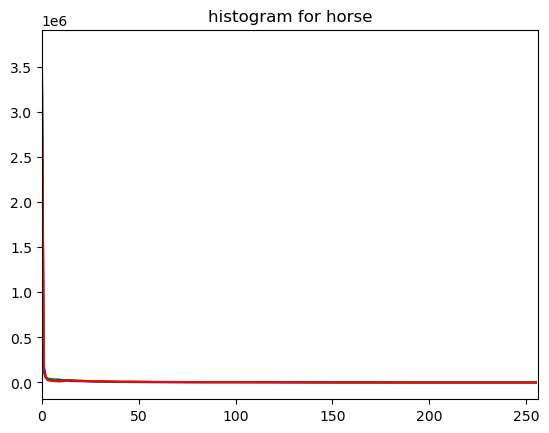

In [11]:
img = dark_horse #now all color channels
color = ('b','g','r')
for i, col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr, color=col)
    plt.xlim([0,256])
plt.title('histogram for horse')

Text(0.5, 1.0, 'histogram for horse')

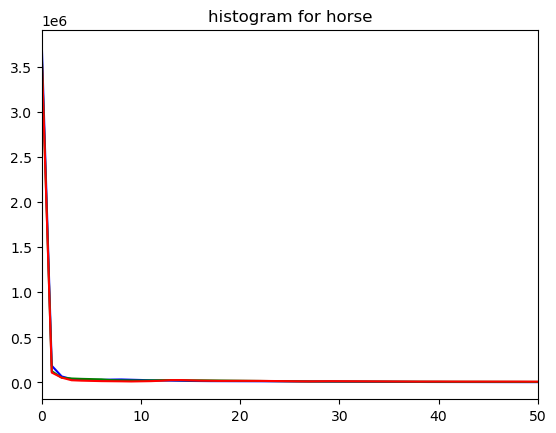

In [12]:
img = dark_horse #to see better, lets cut X max value
color = ('b','g','r')
for i, col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr, color=col)
    plt.xlim([0,50])
plt.title('histogram for horse')

Text(0.5, 1.0, 'histogram for horse')

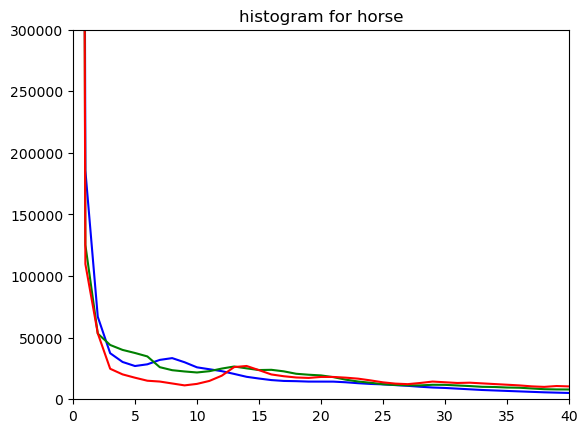

In [13]:
img = dark_horse #to see better, lets cut Y also
color = ('b','g','r')
for i, col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr, color=col)
    plt.xlim([0,40])
    plt.ylim([0,300000])
plt.title('histogram for horse')

In [14]:
dark_horse.shape

(1800, 2700, 3)

In [15]:
1800*2700*3 #amount of pixels

14580000

In [16]:
# Histogram equalization
### is contrast adjustment based on the image's histogram
### it will reduce the shades of gray

In [17]:
img = rainbow.copy()
img.shape

(550, 413, 3)

In [18]:
img.shape[:2]

(550, 413)

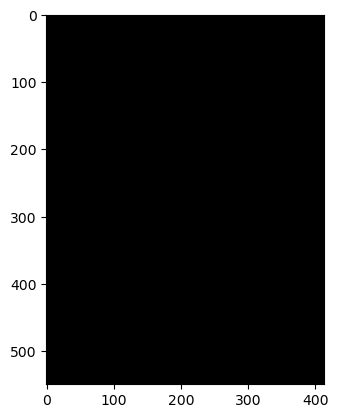

In [19]:
mask = np.zeros(img.shape[:2],np.uint8)
plt.imshow(mask,cmap='gray')

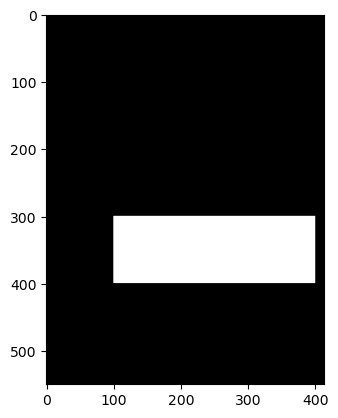

In [20]:
mask[300:400,100:400] = 255
plt.imshow(mask, cmap='gray')

In [21]:
masked_img = cv2.bitwise_and(img, img, mask=mask) #we will use that

In [22]:
show_masked_img = cv2.bitwise_and(show_rainbow, show_rainbow, mask=mask) #but use that to see

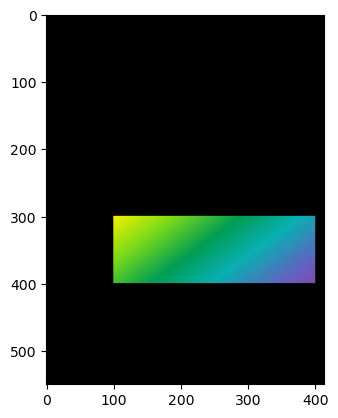

In [23]:
plt.imshow(show_masked_img)

In [24]:
#bgr
hist_mask_values_red = cv2.calcHist([rainbow],channels=[2],mask=mask, histSize=[256],ranges=[0,256])

In [25]:
hist_mask_red = cv2.calcHist([rainbow],channels=[2],mask=None, histSize=[256],ranges=[0,256])

Text(0.5, 1.0, 'red histrogram for masked rainbow')

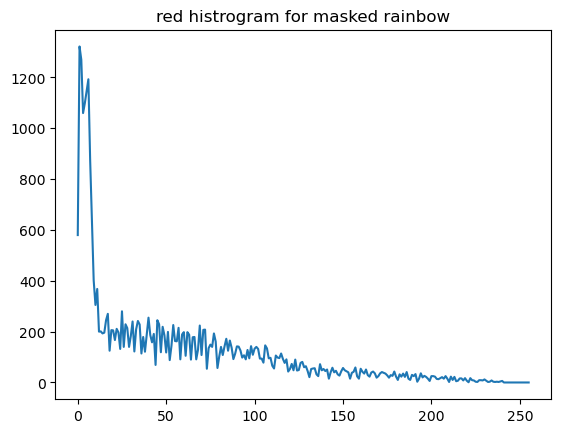

In [26]:
plt.plot(hist_mask_values_red)
plt.title('red histrogram for masked rainbow') #the masked area has almost no red at all

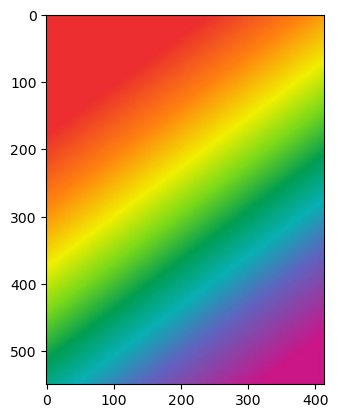

In [27]:
plt.imshow(show_rainbow)

In [29]:
plt.plot(hist_mask_values)
plt.title('red histrogram for normal rainbow') #the image has a lot of red

NameError: name 'hist_mask_values' is not defined